In [27]:
ROOT_PATH = '../../'


In [72]:
import os
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)

def shuffle_inds(arr_len):
    inds = np.arange(arr_len)
    np.random.shuffle(inds)
    return inds

def read_reviews(base_path,split):
    texts = []
    ratings = []
    for sentiment in ["pos", "neg"]:
        folder = os.path.join(base_path, split, sentiment)
        for filename in os.listdir(folder):
            if filename.endswith(".txt"):
                path = os.path.join(folder, filename)
                match = re.search(r"_(\d+)\.txt$", filename)
                if match:
                    with open(path, "r", encoding="utf-8") as f:
                        texts.append(f.read())
                    ratings.append(float(match.group(1)))
                else:
                    print(f"No rating found for filename {filename}")
    return np.asarray(texts), np.array(ratings)

def vectorize_texts(texts):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(texts)
    return X, vectorizer

base_path = os.path.join(ROOT_PATH,"data/raw/aclImdb")

texts_train_full, y_train_full = read_reviews(base_path,split="train")
texts_test_full, y_test_full = read_reviews(base_path,split="test")

shuffled_inds_full = shuffle_inds(len(texts_train_full))
shuffled_inds_test_full = shuffle_inds(len(texts_test_full))

SAMPLE_SIZE = 10000

shuffled_inds = shuffled_inds_full[:SAMPLE_SIZE]
shuffled_inds_test = shuffled_inds_test_full

texts_train, y_train, texts_test, y_test = texts_train_full[shuffled_inds], y_train_full[shuffled_inds], texts_test_full[shuffled_inds_test], y_test_full[shuffled_inds_test]

X_train, vectorizer = vectorize_texts(texts_train)
X_test = vectorizer.transform(texts_test)

print(X_train.shape)
print(X_test.shape)

(10000, 51563)
(25000, 51563)


In [73]:
np.mean(y_train[:100])

5.35

Mean: 232.0494
Standard Deviation: 172.69240330610955


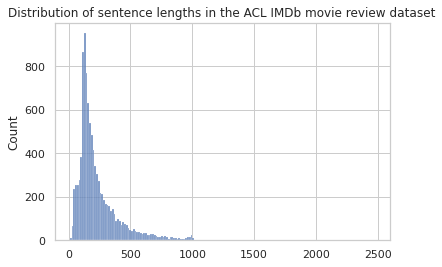

In [74]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def show_document_lengths(X):
    lens = np.asarray([len(text.split()) for text in X])
    sns.histplot(lens)
    plt.title("Distribution of sentence lengths in the ACL IMDb movie review dataset")
    print(f"Mean: {np.mean(lens)}\nStandard Deviation: {np.std(lens)}")

show_document_lengths(texts_train)

In [75]:
import numpy as np
import pandas as pd

def show_top_words(X, vectorizer, top_n=20, plot=True):
    feature_names = vectorizer.get_feature_names_out()
    scores = np.array(X.sum(axis=0)).flatten()
    top_words = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)[:top_n]
    
    for word, score in top_words:
        print(f"{word}: {score:.4f}")
    
    if plot:
        df = pd.DataFrame(top_words, columns=["word", "score"])
        sns.barplot(data=df,x="word",y="score")
        plt.ylabel("Sum of TF-IDF")
        plt.xticks(rotation=90,ha="center")
        plt.title(f"Top {top_n} words")
        plt.show()

the: 1721.5234
and: 873.7979
br: 780.7728
of: 773.7041
to: 731.3645
is: 625.2246
it: 616.7066
in: 523.2945
this: 502.1810
that: 455.7079
movie: 418.7467
was: 392.9948
film: 341.9051
as: 329.1268
you: 321.0409
for: 305.9167
but: 302.2807
with: 299.2019
on: 259.9751
not: 252.3703


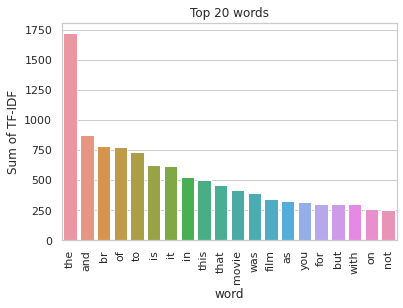

In [76]:
show_top_words(X_train,vectorizer)

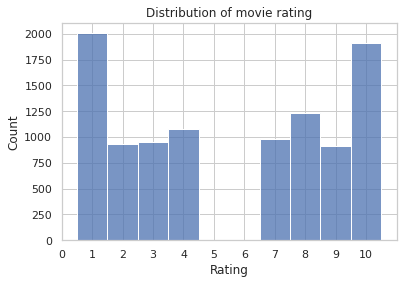

In [77]:
sns.histplot(y_train,bins=10,discrete=True)
plt.xticks(range(11))
plt.xlabel("Rating")
plt.title("Distribution of movie rating")
plt.show()

In [78]:
# Data export
import pickle
EXPORT_FOLDER = os.path.join(ROOT_PATH,'data/processed/imdb/')
if not os.path.exists(EXPORT_FOLDER):
    os.mkdir(EXPORT_FOLDER)
export_path = os.path.join(EXPORT_FOLDER, 'data.pickle')
with open(export_path,"wb") as f:
    pickle.dump((X_train,X_test,y_train,y_test), f)